# Inicijalizacija biblioteka

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Učitavanje podataka

In [2]:
data = np.loadtxt('dataset/data.txt')
data

array([[ 2.4340613 ,  5.27192868,  0.        ],
       [ 1.21403076,  1.08466624,  0.        ],
       [-3.11252628, -0.86332779,  0.        ],
       ...,
       [ 7.92286656,  7.77075534,  1.        ],
       [11.62676793,  9.37774101,  1.        ],
       [10.96518065,  9.73088706,  1.        ]])

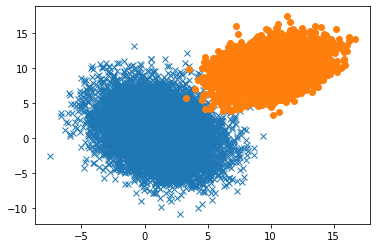

In [3]:
data_class = data[:, 2]
data = data[:,0:2]

class_A = data[data_class==0]
class_B = data[data_class==1]

plt.figure()
plt.plot(class_A[:,0], class_A[:,1], 'x')
plt.plot(class_B[:,0], class_B[:,1], 'o')


# Formiranje vektora - linearna klasifikacija

In [4]:
U = np.ones((3, 20000))
U[0, 0:10000] = -1*U[0, 0:10000]
U[1, 0:10000] = -class_A[:,0];        U[1, 10000:20000] = class_B[:,0]
U[2, 0:10000] = -class_A[:,1];        U[2, 10000:20000] = class_B[:,1]

G = np.ones(20000)
G = np.reshape(G,[-1, 1])

In [5]:
U

array([[-1.        , -1.        , -1.        , ...,  1.        ,
         1.        ,  1.        ],
       [-2.4340613 , -1.21403076,  3.11252628, ...,  7.92286656,
        11.62676793, 10.96518065],
       [-5.27192868, -1.08466624,  0.86332779, ...,  7.77075534,
         9.37774101,  9.73088706]])

# Linearna klasifikacija

Text(0.5, 1.0, 'Linear classifier')

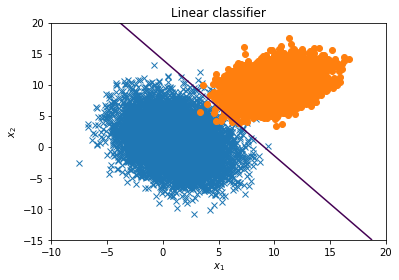

In [6]:
W = np.linalg.inv(U@U.T)@U@G

x = np.linspace(-10, 20, 400); y = np.linspace(-15, 20, 400)
X1, Y1 = np.meshgrid(x, y)

h = np.zeros((400, 400))
for i in range(0, len(x)):
    for j in range(0, len(y)):
        X = np.reshape(np.array([1, x[i], y[j]]),[-1,1])
        h[i, j] = W.T@X


plt.figure(),
plt.plot(class_A[:,0], class_A[:,1], 'x')
plt.plot(class_B[:,0], class_B[:,1], 'o')
plt.contour(X1,Y1,h.T, levels=[0])
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title('Linear classifier')

# Formiranje vektora - kvadratna klasifikacija

In [10]:
U = np.ones((6, 20000))
U[0, 0:10000] = -1*U[0, 0:10000]
U[1, 0:10000] = -class_A[:,0];                U[1, 10000:20000] = class_B[:,0]
U[2, 0:10000] = -class_A[:,1];                U[2, 10000:20000] = class_B[:,1]
U[3, 0:10000] = -class_A[:,0]*class_A[:,1];   U[3, 10000:20000] = class_B[:,0]*class_B[:,1]
U[4, 0:10000] = -class_A[:,0]**2;             U[4, 10000:20000] = class_B[:,0]**2
U[5, 0:10000] = -class_A[:,1]**2;             U[5, 10000:20000] = class_B[:,1]**2


G = np.ones(20000)
G = np.reshape(G,[-1, 1])

# Kvadratna klasifikacija

Text(0.5, 1.0, 'Quadratic classifier')

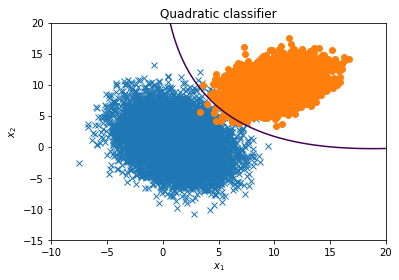

In [11]:
W = np.linalg.inv(U@U.T)@U@G

x = np.linspace(-10, 20, 400); y = np.linspace(-15, 20, 400)
X1, Y1 = np.meshgrid(x, y)

h = np.zeros((400, 400))
for i in range(0, len(x)):
    for j in range(0, len(y)):
        X = np.reshape(np.array([1, x[i], y[j], x[i]*y[j], x[i]**2, y[j]**2]),[-1,1])
        h[i, j] = W.T@X


plt.figure(),
plt.plot(class_A[:,0], class_A[:,1], 'x')
plt.plot(class_B[:,0], class_B[:,1], 'o')
plt.contour(X1,Y1,h.T, levels=[0])
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title('Quadratic classifier')